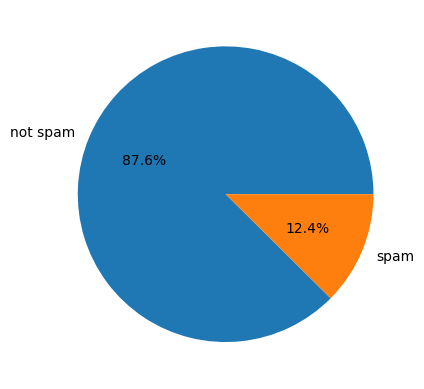

In [37]:
import pandas
import numpy 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix
import seaborn

spamData = pandas.read_csv('spam.csv')
spamData.drop_duplicates(inplace=True)
spamCount = spamData['Category'].value_counts()
plot.pie(spamCount.values, labels=['not spam', 'spam'], autopct = '%.1f%%')
spamData['Category'] = spamData.Category.apply(lambda x: 1 if x=='spam' else 0)
messages = CountVectorizer(stop_words='english').fit_transform(spamData['Message'])
x_train, x_test, y_train, y_test = train_test_split(messages, spamData.Category, test_size=0.2)

cmLabels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       907
           1       1.00      0.73      0.84       125

    accuracy                           0.97      1032
   macro avg       0.98      0.86      0.91      1032
weighted avg       0.97      0.97      0.96      1032

Accuracy 0.9670542635658915
Precision 1.0
Recall 0.728
F1 0.8425925925925926


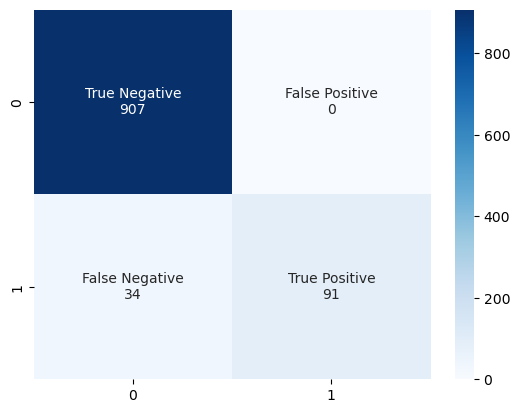

In [38]:
# SVM Model
svmModel = SVC().fit(x_train, y_train)
svmPrediction = svmModel.predict(x_test)
print(metrics.classification_report(y_test, svmPrediction))
svmPrecision = metrics.precision_score(y_test, svmPrediction)
svmAccuracy = metrics.accuracy_score(y_test, svmPrediction)
svmRecall = metrics.recall_score(y_test, svmPrediction)
svmF1 = metrics.f1_score(y_test, svmPrediction)
svmCM = confusion_matrix(y_test, svmPrediction)
svmCounts = ['{0:0.0f}'.format(value) for value in svmCM.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(cmLabels,svmCounts)]
labels = numpy.asarray(labels).reshape(2, 2)
seaborn.heatmap(svmCM, annot=labels, fmt='', cmap='Blues')
print(f"Accuracy {svmAccuracy}")
print(f"Precision {svmPrecision}")
print(f"Recall {svmRecall}")
print(f"F1 {svmF1}")

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       907
           1       0.99      0.78      0.88       125

    accuracy                           0.97      1032
   macro avg       0.98      0.89      0.93      1032
weighted avg       0.97      0.97      0.97      1032

Accuracy 0.9728682170542635
Precision 0.98989898989899
Recall 0.784
F1 0.8750000000000001


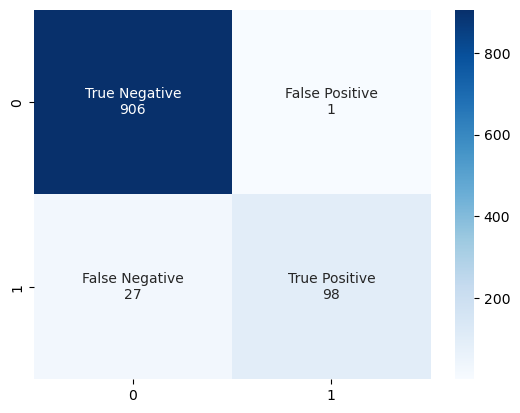

In [39]:
# Logistic Regression
lgModel = LogisticRegression().fit(x_train, y_train)
lgPrediction = lgModel.predict(x_test)
print(metrics.classification_report(y_test, lgPrediction))
lgPrecision = metrics.precision_score(y_test, lgPrediction)
lgAccuracy = metrics.accuracy_score(y_test, lgPrediction)
lgRecall = metrics.recall_score(y_test, lgPrediction)
lgF1 = metrics.f1_score(y_test, lgPrediction)
lgCM = confusion_matrix(y_test, lgPrediction)
lgCounts = ['{0:0.0f}'.format(value) for value in lgCM.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(cmLabels,lgCounts)]
labels = numpy.asarray(labels).reshape(2, 2)
seaborn.heatmap(lgCM, annot=labels, fmt='', cmap='Blues')
print(f"Accuracy {lgAccuracy}")
print(f"Precision {lgPrecision}")
print(f"Recall {lgRecall}")
print(f"F1 {lgF1}")

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       907
           1       0.94      0.97      0.95       125

    accuracy                           0.99      1032
   macro avg       0.97      0.98      0.97      1032
weighted avg       0.99      0.99      0.99      1032

Accuracy 0.9883720930232558
Precision 0.937984496124031
Recall 0.968
F1 0.952755905511811


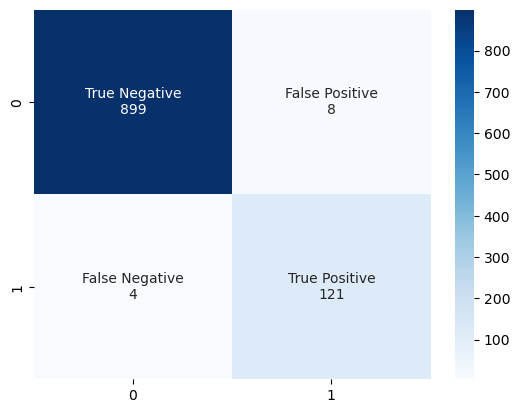

In [40]:
# Naives Bayes 
nbModel = MultinomialNB().fit(x_train, y_train)
nbPrediction = nbModel.predict(x_test)
print(metrics.classification_report(y_test, nbPrediction))
nbPrecision = metrics.precision_score(y_test, nbPrediction)
nbAccuracy = metrics.accuracy_score(y_test, nbPrediction)
nbRecall = metrics.recall_score(y_test, nbPrediction)
nbF1 = metrics.f1_score(y_test, nbPrediction)
nbCM = confusion_matrix(y_test, nbPrediction)
nbCounts = ['{0:0.0f}'.format(value) for value in nbCM.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(cmLabels,nbCounts)]
labels = numpy.asarray(labels).reshape(2, 2)
seaborn.heatmap(nbCM, annot=labels, fmt='', cmap='Blues')
print(f"Accuracy {nbAccuracy}")
print(f"Precision {nbPrecision}")
print(f"Recall {nbRecall}")
print(f"F1 {nbF1}")

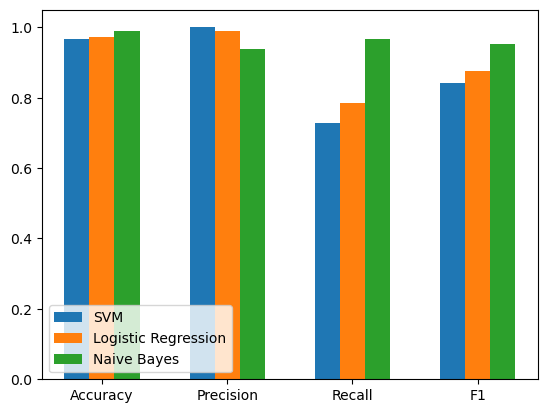

In [41]:
xAxis = ['Accuracy', 'Precision', 'Recall', 'F1']
SVM = [svmAccuracy, svmPrecision, svmRecall, svmF1]
lg = [lgAccuracy, lgPrecision, lgRecall, lgF1]
nb = [nbAccuracy, nbPrecision, nbRecall, nbF1]
x = numpy.arange(len(xAxis))
width = 0.2
fig, ax = plot.subplots()
bar1 = ax.bar(x - 0.2, SVM, width, label='SVM')
bar2 = ax.bar(x, lg, width, label='Logistic Regression')
bar3 = ax.bar(x + 0.2, nb, width, label='Naive Bayes')

ax.set_xticks(x, xAxis)
ax.legend(loc='lower left')
 
plot.show()

